In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start=pd.to_datetime('2010-01-01')
end=pd.to_datetime('2019-12-31')
df=data.DataReader("AAPL",'stooq',start,end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,71.0084,71.9246,70.9077,71.9176,1.030855e+08
2019-12-30,70.8938,71.6864,69.8549,71.3983,1.472306e+08
2019-12-27,71.3015,71.9974,70.5647,70.9755,1.494081e+08
2019-12-26,69.7592,71.0214,69.7303,71.0034,9.527219e+07
2019-12-24,69.7273,69.7762,69.2907,69.6226,4.948450e+07


In [3]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08
2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08


In [4]:
#resetting index
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-12-31,71.0084,71.9246,70.9077,71.9176,1.030855e+08
1,2019-12-30,70.8938,71.6864,69.8549,71.3983,1.472306e+08
2,2019-12-27,71.3015,71.9974,70.5647,70.9755,1.494081e+08
3,2019-12-26,69.7592,71.0214,69.7303,71.0034,9.527219e+07
4,2019-12-24,69.7273,69.7762,69.2907,69.6226,4.948450e+07


In [5]:
#we don't need date because we already know they are in sequence
df=df.drop('Date',axis=1)
df.head()

,Open,High,Low,Close,Volume
0,71.0084,71.9246,70.9077,71.9176,1.030855e+08
1,70.8938,71.6864,69.8549,71.3983,1.472306e+08
2,71.3015,71.9974,70.5647,70.9755,1.494081e+08
3,69.7592,71.0214,69.7303,71.0034,9.527219e+07
4,69.7273,69.7762,69.2907,69.6226,4.948450e+07


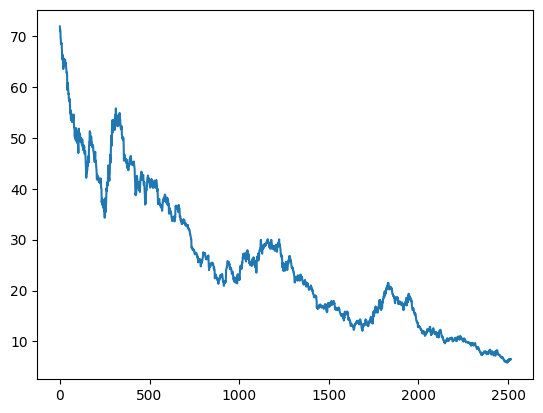

In [6]:
plt.plot(df['Close'])

In [7]:
# now we find mean of close values with 100 close values before it
k=df.Close.rolling(100).mean()
print(k[98])#nan
k[99]# average of 100 numbers before

nan


59.002407000000005

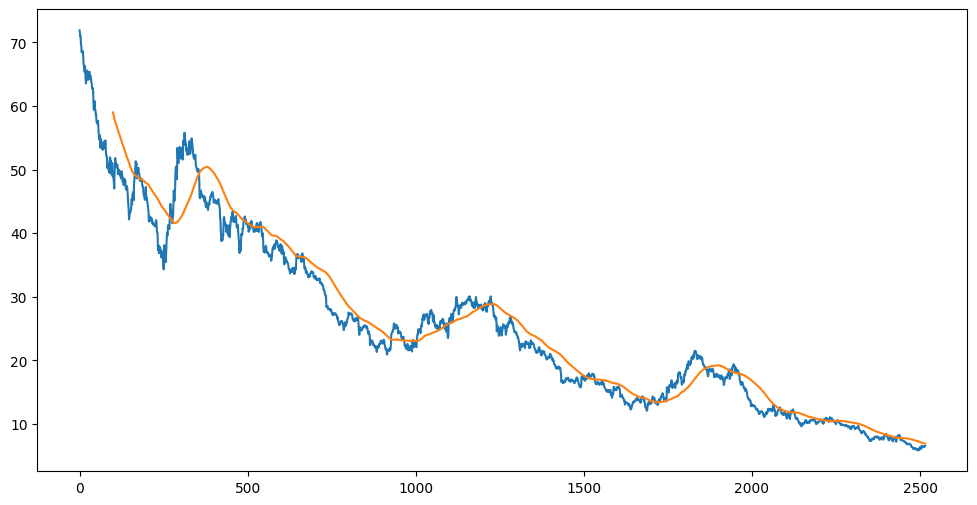

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(k)
#ploting graph of close values and 100 average values

In [25]:
#train and split
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(type(data_training))
print(data_testing.shape)

(1761, 1)
<class 'pandas.core.frame.DataFrame'>
(755, 1)


In [26]:
#Now we strandardize the data taken in 0-1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training)
data_training_array
print(type(data_training))

<class 'pandas.core.frame.DataFrame'>


In [22]:
X_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
X_train ,y_train=np.array(X_train),np.array(y_train)
y_train.shape

(1661,)

In [50]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [51]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
52/52 [==============================] - 33s 426ms/step - loss: 0.0228
Epoch 2/10
52/52 [==============================] - 23s 433ms/step - loss: 0.0051
Epoch 3/10
52/52 [==============================] - 23s 440ms/step - loss: 0.0045
Epoch 4/10
52/52 [==============================] - 23s 443ms/step - loss: 0.0038
Epoch 5/10
52/52 [==============================] - 19s 372ms/step - loss: 0.0036
Epoch 6/10
52/52 [==============================] - 22s 416ms/step - loss: 0.0034
Epoch 7/10
52/52 [==============================] - 22s 422ms/step - loss: 0.0032
Epoch 8/10
52/52 [==============================] - 22s 417ms/step - loss: 0.0032
Epoch 9/10
52/52 [==============================] - 22s 418ms/step - loss: 0.0030
Epoch 10/10
52/52 [==============================] - 23s 440ms/step - loss: 0.0029


In [52]:
y_train.shape
model.save('keras_model')

INFO:tensorflow:Assets written to: keras_model\assets


INFO:tensorflow:Assets written to: keras_model\assets


In [53]:
y_train.shape
print(type(data_training))

<class 'pandas.core.frame.DataFrame'>


In [54]:
data_testing.head()

,Close
1761,16.8635
1762,16.3442
1763,15.6512
1764,15.8198
1765,15.7560


In [55]:
data_training.tail(100)

,Close
1661,13.7261
1662,13.8437
1663,13.7481
1664,13.7241
1665,13.6723
...,...
1756,15.8826
1757,16.1338
1758,16.0899
1759,16.1876


In [56]:
past=data_training.tail(100)
df2=pd.concat([past,data_testing],ignore_index=True)
df2.head()

,Close
0,13.7261
1,13.8437
2,13.7481
3,13.7241
4,13.6723


In [58]:
input_data.shape

(855, 1)

In [59]:
X_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [60]:
X_test,y_test=np.array(X_test),np.array(y_test)

In [61]:
print(X_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [62]:
#making predictions
y_predict=model.predict(X_test)


24/24 [==============================] - 6s 178ms/step


In [63]:
y_predict.shape

(755, 1)

In [64]:
scaler.scale_

array([0.06402036])

In [65]:
scaler_factor=1/0.06402036
y_predicted=y_predict*scaler_factor
y_test=y_test*scaler_factor

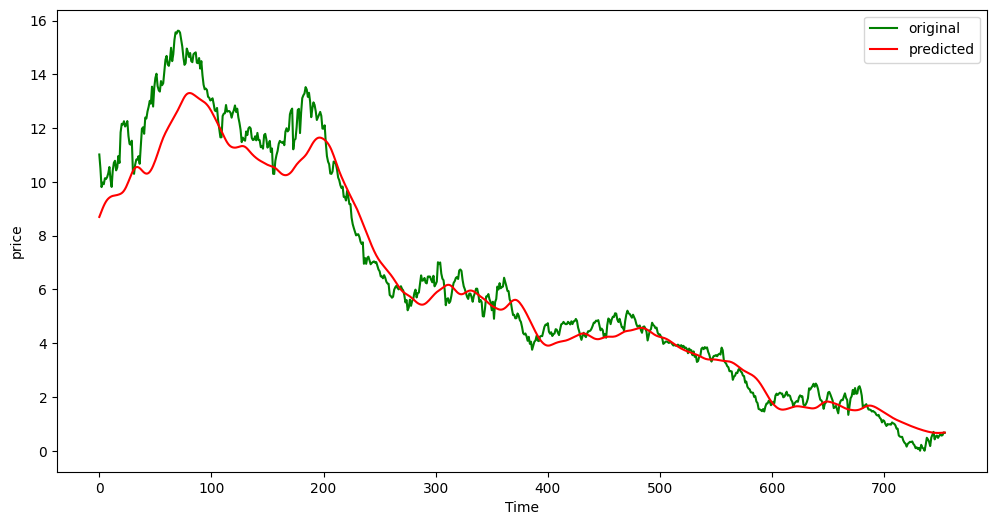

In [66]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'g',label='original')
plt.plot(y_predicted,'r',label='predicted')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()